In [1]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 데이터 특성의 수
# 이진분류 or 다중분류 or 회귀

# 분류 : 정답의 종류가 정해져있다. ex) 혈액형, MBTI
# 회귀 : 정답의 범위가 정해져있다. ex) 집값, 성적예측

In [3]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
# 딥러닝 모델 설계에 필요한 기능 불러오기
# 건물을 짓는다
from tensorflow.keras.models import Sequential # 딥러닝 모델의 틀, 건물 바닥 다지기
from tensorflow.keras.layers import Dense # 딥러닝 세부 설정, 건물에서 한 층 디자인하기

In [5]:
# 딥러닝 모델 설계
# 딥러닝 모델 객체 생성
model = Sequential()

# 딥러닝 세부설정
# 한 층씩 설정해줘야함
# Dense : 퍼셉트론 하나
# 입력층 : 데이터가 처음 들어가는 층
model.add(Dense(units = 30, input_dim = 13, activation='relu'))
# units : 퍼셉트론에서 사용할 가중치의 갯수
#         한 퍼셉트론이 할 수 있는 생각의 갯수
# input_dim : 입력 데이터 특성의 크기
#             첫 번째 층에만 자겅
# activation : 활성화 함수, 다음층으로 값을 넘기는 방법
#              다음층으로 값을 넘기기 전에 기존의 값을 한번 정리

# 중간층(은닉층) : 입력층, 출력층을 제외한 나머지 층
# 중간층 : 데이터에서 특징 찾기
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Dense(units = 32, activation='relu'))

# 출력층 : 가장 마지막에 나오는 층, 입력층과 중간층에서 분석한 값을 결론내리기
# units과 activation은 신경써서 적어야한다
model.add(Dense(units = 1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 딥러닝 모델 학습 방법 설정
# 신경써서 적어야 함
model.compile(
    loss = 'mean_squared_error', # 모델을 얼마나 수정해야하는지 계산할 값
    optimizer = 'adam', # 경사하강법의 종류 > 오차를 어떻게 반영할 것인지
    metrics = ['mse'] # 모델이 잘 만들어졌는지 평가할 기준이 되는 값
)

In [9]:
# 학습하기
# epochs = 학습의 횟수
# 딥러닝 모델은 epochs만큼 발전하려고함
h = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7424 - mse: 16.7424 
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5501 - mse: 11.5501
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.0668 - mse: 11.0668
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.8335 - mse: 13.8335 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.6098 - mse: 13.6098 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.9564 - mse: 11.9564
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.5704 - mse: 12.5704
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.7076 - mse: 12.7076
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.0271 - mse: 14.0271  
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4328 - mse: 18.4328 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.5259 - mse: 14.5259 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6424 - mse: 14.6424 
Epoch

Mounted at /content/drive


### 퍼셉트론
 - 딥러닝은 기계가 사람처럼 유연한 사고를 하게 만들려는 시도
 - 인간이 유연한 사고를 하는건 뉴런의 역할이 크다
 - 기계에게도 인간의 뉴런을 만들어주자 = 퍼셉트론
 - 퍼셉트론 = 선형함수(LinearRegression)
 - 딥러닝 = 여러개의 퍼셉트론 = 여러개의 선형함수

 - y = w1x1 + w2x2 + w3x3 + ... + w13x13 + b = 선형함수
 w = 가중치 : 각각의 데이터에 곱해지는 수, 데이터가 갖는 의미가 다르기 때문에 입력 데이터마다 다른 값이 곱해진다
 x = 입력데이터 : 문제데이터, 특성별로 나눠서 생각해야함
 b = 편향 : 예측값을 구하는데 있어서 입력데이터로 설명할수 없는 무언가
 p = 특성의 갯수

### MLP (Multi Layer Perceptron)
 - 퍼셉트론들이 병렬적 다층 구조로 연결되어있는 딥러닝 모델
 - 퍼셉트론 안의 units 의 숫자가 클수록, 많은 퍼셉트론이 있을수록 MLP의 다양성이 커진다
 - 퍼셉트론 안의 각각의 unit들은 다음 퍼셉트론의 unit에게 값을 전달하기 전에 활성화함수   
   를 거친다
 - 퍼셉트론 단위로 같은 활성화함수를 사용

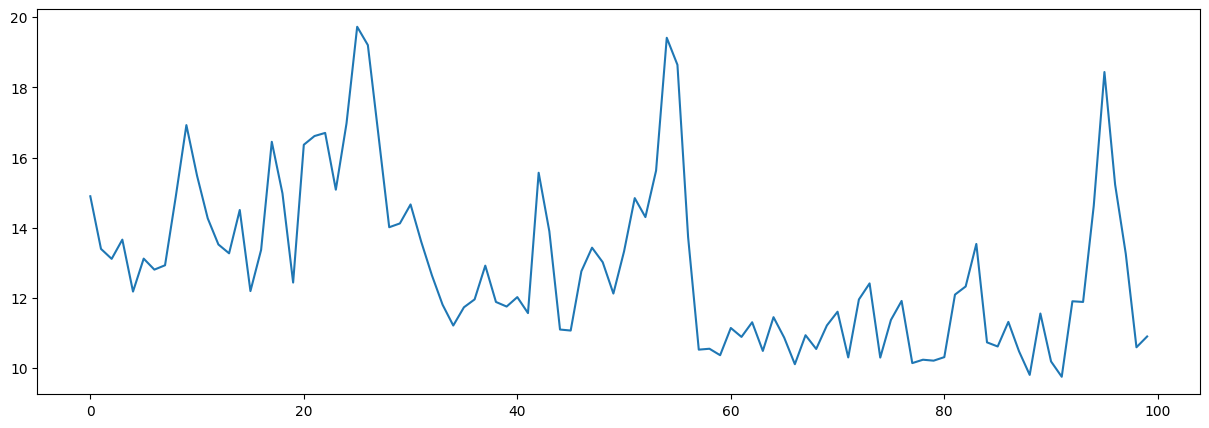

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5)) # 그래프 크기 조정
plt.plot(h.history['mse'])
plt.show()
# 딥러닝 모델은 매 학습시마다 모델을 개선시키려곡 한다.

활성화 함수
 - 유닛 뒤에서 동작하며, 유닛의 결과를 다음 퍼셉트론의 유닛에 전달하기 전에 값을 정리
 - sigmoid, tanh, linear, softmax, relu, leaky relu, maxout, elu .... 

 - 출력층에서 사용하는 활성화 함수 : sigmoid, softmax, linear
    : 분석된 데이터를 종합
 - sigmoid : 이진분류의 출력층에서 사용
  : 입력값에 대해 0~1까지로 값을 출력, 이진분류에서 사용(개-0 vs 고양이-1)
  : 0 ~ 0.5 : 0이라고 판단
  : 0.5 ~ 1 : 1이라고 판단
  : 출력된 값을 보면 모델이 얼마나 예측을 잘하는지 알 수 있음
  : 0.5에 가까울수록 결과가 확실하지 않다
  : 0.5에서 멀어질수록 결과가 확실하다
  : 0.45 = 0, 개, 조금 애매하다
  : 0.95 = 1, 고양이, 확실하다
  : 결과값을 확인하면 얼마나 정확하게 예측했는지 알 수 있고, 이를 통해서 모델을 얼마나 개선해야되는지 알 수 있다.

 - softmax : 다중분류의 출력층에서 사용
  : 결과값을 확인하면 얼마나 정확하게 예측했는지 알 수 있고, 이를 통해서 모델을 얼마나 개선해야되는지 알 수 있다.
  : 각 정답이 될 확률값을 출력
  : ex) 혈액형
  : A = 10% B = 60% O = 5% AB = 25% > B 형

 - linear : 회귀의 출력층에서 사용
  : 결과값을 확인하면 얼마나 정확하게 예측했는지 알 수 있고, 이를 통해서 모델을 얼마나 개선해야되는지 알 수 있다.
  : 값을 그대로 사용, 회귀는 에초에 연속적인 수치값이므로 정리할 필요가 없다
  : ex ) 집값예측 > 예측값 : 5천만원, 실제값 : 1억


 - 입력층과 중간층에서 사용하는 활성화 함수 
    : 데이터를 분석하고 다음층에 전달하기전에 정리
    : sigmoid, tanh, relu, Maxout, elu ... 
   - sigmoid : 미분시 값의 범위가 0 ~ 0.25
                 > 다음 층으로 오차를 전달하는 과정에서 오차의 값을 최대 25%까지만 전달
                 > 오차의 전달이 제대로 되지 않는다 > 학습이 제대로 되지 않는다 
                 > 기울기 소실(Vanishing Gradient)이 발생 > 거의 사용하지 않음

   - tanh : 입력값을 -1 ~ 1의 범위로 출력, 미분시 값의 범위가 0 ~ 0.5 > 기울기 소실이 발생 
                 > 거의 사용하지 않음

   - relu : 0보다 작은 값은 0으로, 0보다 큰 값은 그대로 사용, 0보다 작은 값은 쓸모없는 값 > 사용 X
           미분시에 0보다 작은것은 0, 0보다 큰것은 1 > 보편적으로 사용, 간단하고 효율이 좋다

   - Leaky Relu :  0보다 큰 값은 그대로 사용, 0보다 작은건 조금만 사용하자
          미분시에 0보다 작은것은 0.1, 0보다 큰것은 1 > relu와 큰 차이가 없음, 계산량이 많이 늘어남

   - Elu : 0보다 큰 값은 그대로 사용, 0보다 작은건 0에 가까울수록 많이, 멀수록 조금 사용
     미분시에 0보다 작은것은 0에 가까울수록 크고, 0에서 멀수록 매우 작아짐, 0보다 큰것은 1
            > relu와 큰 차이가 없음, 계산량이 많이 늘어남
   - maxout : leaky Relu와 Elu의 중간 > relu와 큰 차이가 없음, 계산량이 많이 늘어남

   - 결국엔 잘 모르겠으면 relu 사용 > 다른거 써보고싶다? Leaky Relu, Maxout, ELU 사용


* 오차역전파
 - 딥러닝 모델의 동작 방식
 - 순전파 : 입력데이터를 입력층에서부터 출력층 방향으로 전파시키면서 예측값을 구하는 과정 
> 추론
 - 역전파 : 예측값과 실제값의 차이인 오차를 출력층에서 입력층 방향으로 적용시키면서 모델을 학습하는 과정, 과정중에 미분을 해야한다. 
> 학습